# GRADIENT BOOSTED TREE
## Exploring data
Data: Heart data from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

We will design a model that will classify those with heart problems using the heart data from Kaggle

This is the variable description from Kaggle:

age: in years <br>
sex: 1=male, 0 =female <br>
cp: chest pain type (4 values: 0 = typical angina,  1= atypical angina, 2 = non-anginal pain, 3 = asymptomatic) <br>
trestbps: resting blood pressure <br>
chol: serum cholestoral in mg/dl<br>
fbs: fasting blood sugar (1 = true; 0 = false) > 120 mg/dl<br>
restecg: resting electrocardiographic results (values 0, normal,1, ST-T wave abnormality, 2, ventricular hypertrophy)<br>
thalach: maximum heart rate achieved <br>
exang: exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest<br>
slope: the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping) <br>
ca: number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
target:  diagnosis of heart disease (angiographic disease status)
— Value 0: < 50% diameter narrowing
— Value 1: > 50% diameter narrowing

**WARNING**: this is an old dataset (1988) with limited data for medical analyses. Also, there is a larger population of males (207) than females (93), biasing the data.

In [156]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

path = 'C:/Users/Katia/Documents/Machine Learning'
os.chdir(path)

In [157]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('heart_categories.csv')

In [158]:
# Check variables
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,above_120,normal,150,no,2.3,upsloping,0,1,above_50
1,37,male,no_angina,130,250,below_120,ST_T_abnorm,187,no,3.5,upsloping,0,2,above_50
2,41,female,atyp_angina,130,204,below_120,normal,172,no,1.4,downsloping,0,2,above_50
3,56,male,atyp_angina,120,236,below_120,ST_T_abnorm,178,no,0.8,downsloping,0,2,above_50
4,57,female,typ_angina,120,354,below_120,ST_T_abnorm,163,yes,0.6,downsloping,0,2,above_50


In [159]:
# Check descriptive statistics of continuous variables
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,2.313531
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.612277
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,2.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000


In [160]:
# Check mean scores for those with and without a heart condition
df.groupby(['target']).mean()

,age,trestbps,chol,thalach,oldpeak,ca,thal
target,,,,,,,
above_50,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636,2.121212
below_50,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667,2.543478


In [161]:
# Check if there are any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values. There is no need to fill missing data with means or discard rows.

Because the "thal" variable available in Kaggle does not match the variable description in the UCI repository (http://archive.ics.uci.edu/ml/datasets/Heart+Disease), I will drop it.

In [162]:
df = df.drop(['thal'], axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,male,asymptomatic,145,233,above_120,normal,150,no,2.3,upsloping,0,above_50
1,37,male,no_angina,130,250,below_120,ST_T_abnorm,187,no,3.5,upsloping,0,above_50
2,41,female,atyp_angina,130,204,below_120,normal,172,no,1.4,downsloping,0,above_50
3,56,male,atyp_angina,120,236,below_120,ST_T_abnorm,178,no,0.8,downsloping,0,above_50
4,57,female,typ_angina,120,354,below_120,ST_T_abnorm,163,yes,0.6,downsloping,0,above_50


### Explore continuous variables

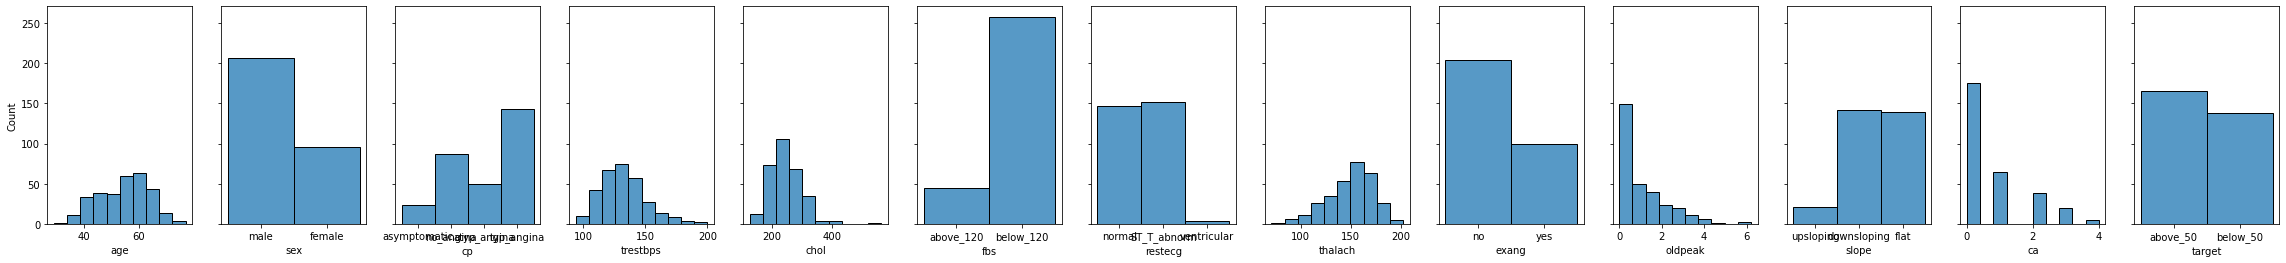

In [163]:
# Histogram

# Exploring distributions with histograms

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13) = plt.subplots(1, 13, sharey=True, figsize = (40,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1

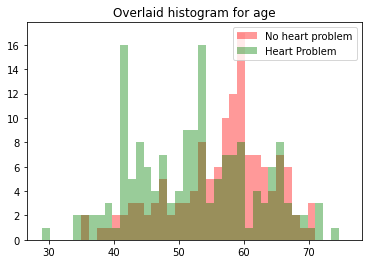

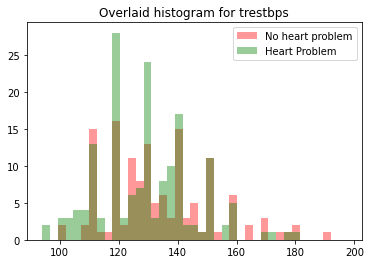

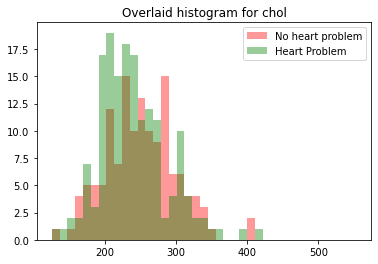

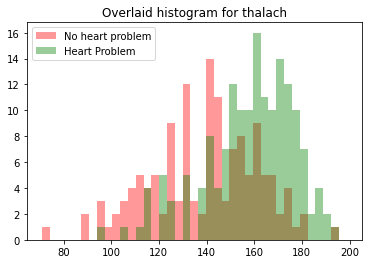

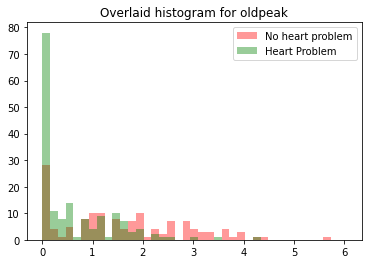

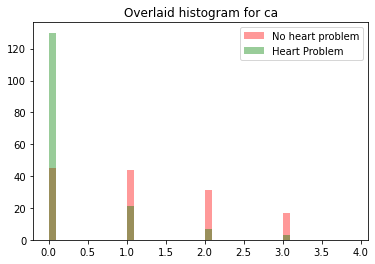

In [164]:
# Overlaid histograms

df2 = df.drop(['target', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope'], axis = 1)
for i in df2:
    no_heart_problem = list(df[df['target'] == "below_50"][i].dropna())
    heart_problem = list(df[df['target'] == 'above_50'][i].dropna())
    xmin = min(min(no_heart_problem), min(heart_problem))
    xmax = max(max(no_heart_problem), max(heart_problem))
    width = (xmax - xmin) / 40
    sns.distplot(no_heart_problem, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(heart_problem, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['No heart problem', 'Heart Problem'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

Heart problem seems to be more common among people who are middle-aged, that achieves higher heart rate, and that have lower ST depression induced by exercise. The distribution for cholestherol and resting blood pressure seems roughly the same for both groups. Fewer vessels are linked to heart disease.

Let's explore the relationship with the dependent variable (i.e., target) and continuous variables with box plots.

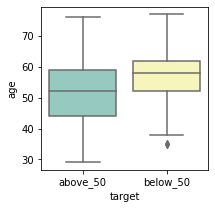

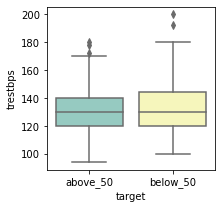

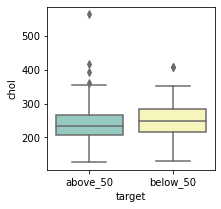

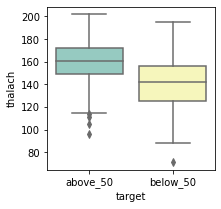

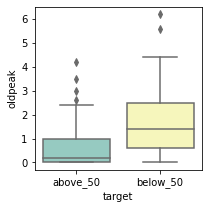

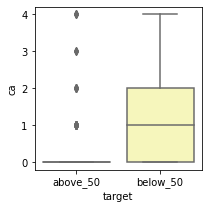

In [165]:
# Boxplots
for column in df2: 
    plt.figure(figsize=(3,3))
    sns.boxplot(df['target'], df2[column], palette="Set3")
    plt.show()

Boxplots confirm that heart problem seems to be more common among people who are middle-aged, that achieves higher heart rate, and that have lower ST depression induced by exercise. The variables with the most impact seems to be "ca" and "oldpeak." 

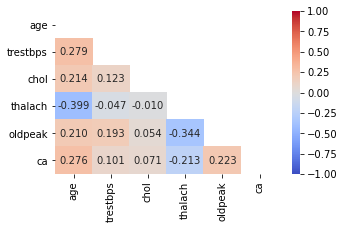

In [167]:
# Generate correlation matrix heat map to check for multicollinearity
plt.figure(figsize = (5, 3))
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

None of the constinuous variables hightly correlate with each other

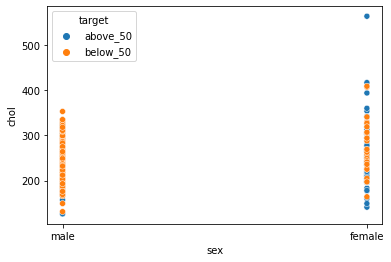

In [168]:
# Scatterplot discriminating groups

sns.scatterplot(df['sex'], df['chol'], hue= df['target'])

In [169]:
df.groupby(['sex','target'])['target'].count()

sex     target  
female  above_50     72
        below_50     24
male    above_50     93
        below_50    114
Name: target, dtype: int64

Females seems to have more heart conditions, regardless of cholesterol level.

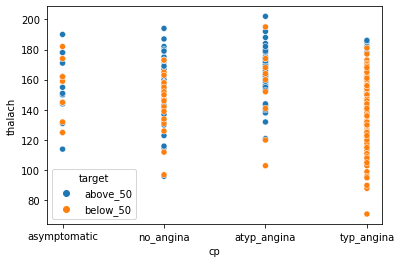

In [170]:
sns.scatterplot(df['cp'], df['thalach'], hue= df['target'])

Contrary to expectations, typical angina or chest pain was related to fewer heart problems, whereas people with lower or no angina and with higher maximum heart rate tended to have heart problems.

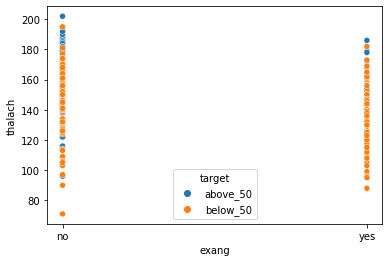

In [171]:
sns.scatterplot(df['exang'], df['thalach'], hue= df['target'])

In [172]:
df.groupby(['exang','target'])['target'].count()

exang  target  
no     above_50    142
       below_50     62
yes    above_50     23
       below_50     76
Name: target, dtype: int64

People with lower maximum heart rate and no exercise induced angina had more heart problems.

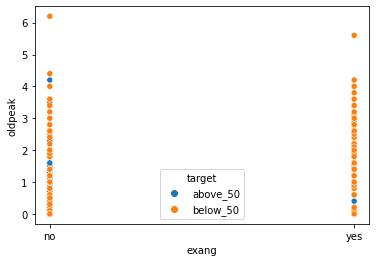

In [173]:
sns.scatterplot(df['exang'], df['oldpeak'], hue= df['target'])

In [174]:
df.groupby(['exang','target'])['target'].count()

exang  target  
no     above_50    142
       below_50     62
yes    above_50     23
       below_50     76
Name: target, dtype: int64

People without exercise induced angina and with higher ST depression induced by exercise seem to be more prone to heart problems. The trends are not strong, though.

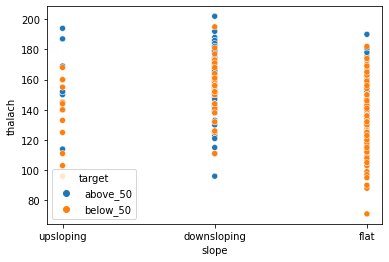

In [175]:
sns.scatterplot(df['slope'], df['thalach'], hue= df['target'])

People with a flat slope of the peak exercise tended not to have heart problems, especially those with lower maximum heart rate.

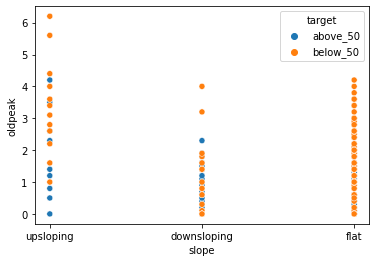

In [176]:
sns.scatterplot(df['slope'], df['oldpeak'], hue= df['target'])

People with a flat slope of the peak exercise tended not to have heart problems. ST depression does not seem to interact with those with upsloping and downsloping.

### Distribution of categorical variables

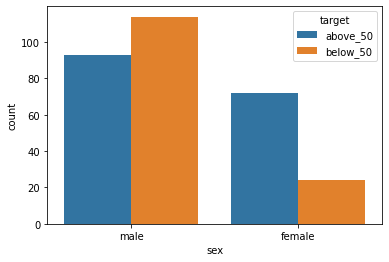

In [177]:
sns.countplot(df['sex'], hue = df['target'])

As discussed previously, more females had heart problems

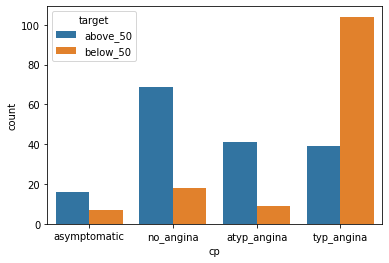

In [178]:
sns.countplot(df['cp'], hue = df['target'])

Also as discussed previously, those with chest pain (typical angina) had fewer hard problems, contrary to expectations.

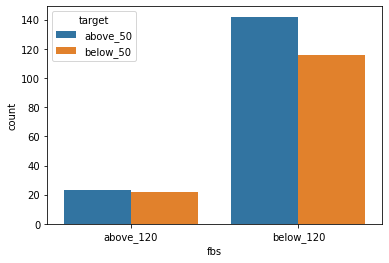

In [179]:
sns.countplot(df['fbs'], hue = df['target'])

In the group with fasting blood sugar below 120mg/dl, heart problem was more common, contrary to expectations.

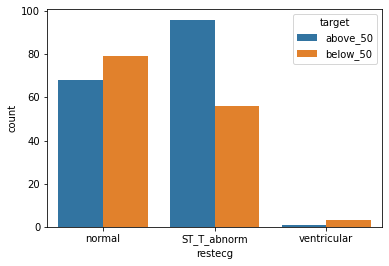

In [180]:
sns.countplot(df['restecg'], hue = df['target'])

Heart problems were slightly more common among those with normal resting rate, contrary to expectations.

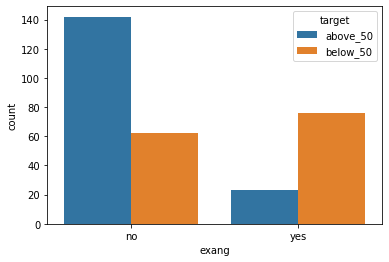

In [181]:
sns.countplot(df['exang'], hue = df['target'])

Heart problem was more common among those without exercise induced angina, contrary to expectations.

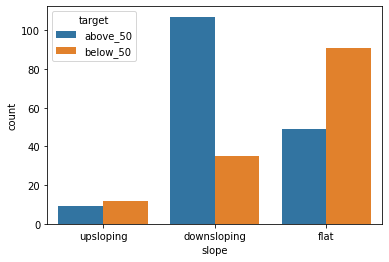

In [182]:
sns.countplot(df['slope'], hue = df['target'])

Heart problems were more common among those with a downwards slope.

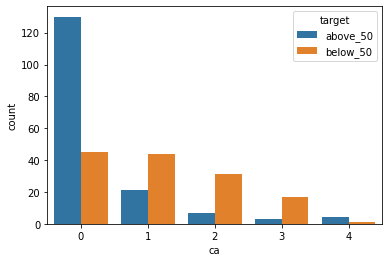

In [183]:
sns.countplot(df['ca'], hue = df['target'])

0 major vessels were related to more heart problems.

## Feature engineering

We may want to explore a few new variables: a binary "ca" variable (equal or above 0), and a binary "cp" variable (typical_angina versus others).

In [184]:
ca_binary = []
for row in df['ca']:
    if row == 0:
        ca_binary.append(0)
    else:
        ca_binary.append(1)
df['ca_binary'] = ca_binary

In [185]:
cp_binary = []
for row in df['cp']:
    if row == 'typ_angina':
        cp_binary.append('typ_angina')
    else:
        cp_binary.append('other')
df['cp_binary'] = cp_binary

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,ca_binary,cp_binary
0,63,male,asymptomatic,145,233,above_120,normal,150,no,2.3,upsloping,0,above_50,0,other
1,37,male,no_angina,130,250,below_120,ST_T_abnorm,187,no,3.5,upsloping,0,above_50,0,other
2,41,female,atyp_angina,130,204,below_120,normal,172,no,1.4,downsloping,0,above_50,0,other
3,56,male,atyp_angina,120,236,below_120,ST_T_abnorm,178,no,0.8,downsloping,0,above_50,0,other
4,57,female,typ_angina,120,354,below_120,ST_T_abnorm,163,yes,0.6,downsloping,0,above_50,0,typ_angina


## Removing outliers

In [186]:
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [187]:
for variable in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    outlier(variable)


Outlier caps for age:
  --95p: 68.0 / 13 values exceed that
  --3sd: 81.6 / 0 values exceed that
  --99p: 71.0 / 3 values exceed that

Outlier caps for trestbps:
  --95p: 160.0 / 15 values exceed that
  --3sd: 184.2 / 2 values exceed that
  --99p: 180.0 / 2 values exceed that

Outlier caps for chol:
  --95p: 326.9 / 16 values exceed that
  --3sd: 401.5 / 4 values exceed that
  --99p: 406.7 / 4 values exceed that

Outlier caps for thalach:
  --95p: 181.9 / 16 values exceed that
  --3sd: 218.2 / 1 values exceed that
  --99p: 192.0 / 4 values exceed that

Outlier caps for oldpeak:
  --95p: 3.4 / 14 values exceed that
  --3sd: 4.5 / 2 values exceed that
  --99p: 4.2 / 3 values exceed that


In [188]:
# Remove outliers based on 99 quantile

df['age']= df['age'].clip(upper=df['age'].quantile(.99))
df['trestbps'] = df['trestbps'].clip(upper=df['trestbps'].quantile(.99))
df['chol']= df['chol'].clip(upper=df['chol'].quantile(.99))
df['thalach'] = df['thalach'].clip(upper=df['thalach'].quantile(.99))
df['oldpeak']= df['oldpeak'].clip(upper=df['oldpeak'].quantile(.99))


In [189]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,ca_binary
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.320132,131.518152,245.702838,149.596832,1.027723,0.729373,0.422442
std,8.983787,17.190754,49.225445,22.803894,1.119258,1.022606,0.494765
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,71.000000,180.000000,406.740000,191.960000,4.200000,4.000000,1.000000


## Transform skewed variables

In [190]:
from scipy.stats import shapiro

variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# normality test
for column in variables:
    stat, p = shapiro(df[column])
    print(column + ' Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks normally distributed')
    else:
        print('Sample does not look normally distributed')

age Statistics=0.980, p=0.000
Sample does not look normally distributed
trestbps Statistics=0.970, p=0.000
Sample does not look normally distributed
chol Statistics=0.980, p=0.000
Sample does not look normally distributed
thalach Statistics=0.972, p=0.000
Sample does not look normally distributed
oldpeak Statistics=0.851, p=0.000
Sample does not look normally distributed


In [191]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

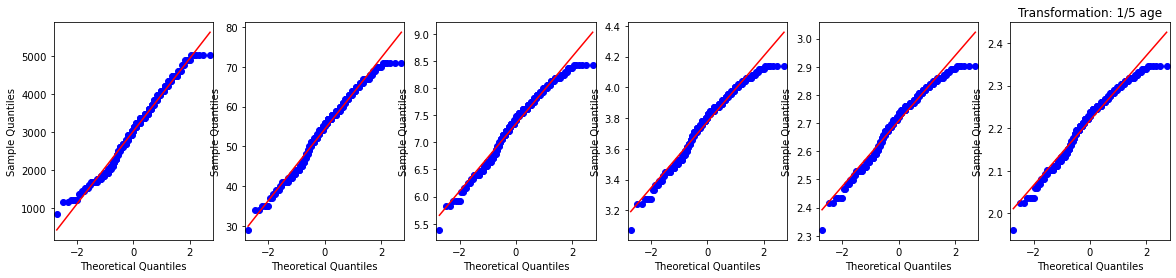

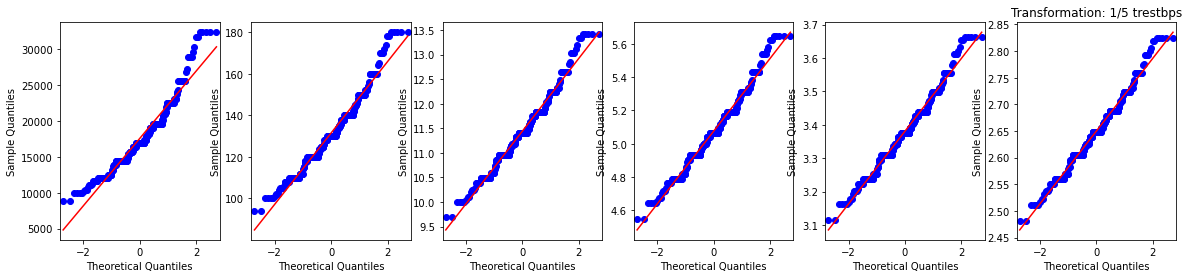

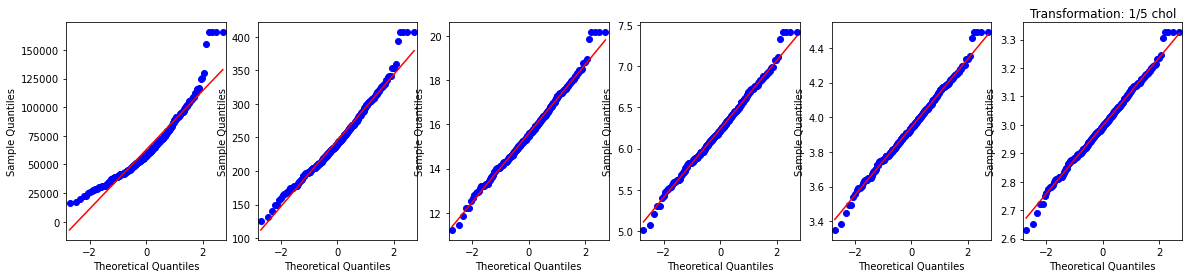

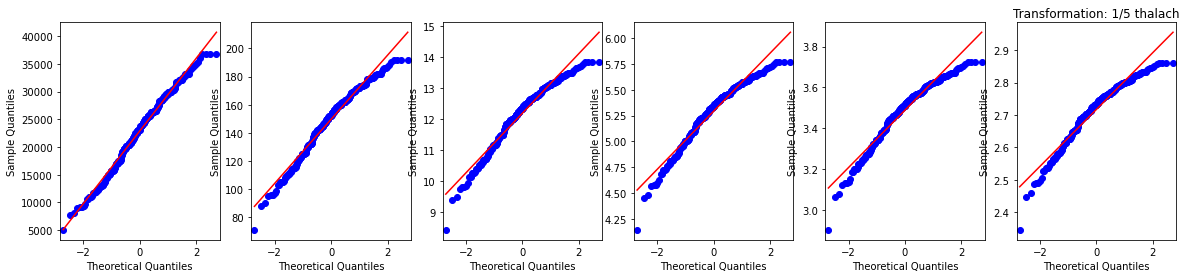

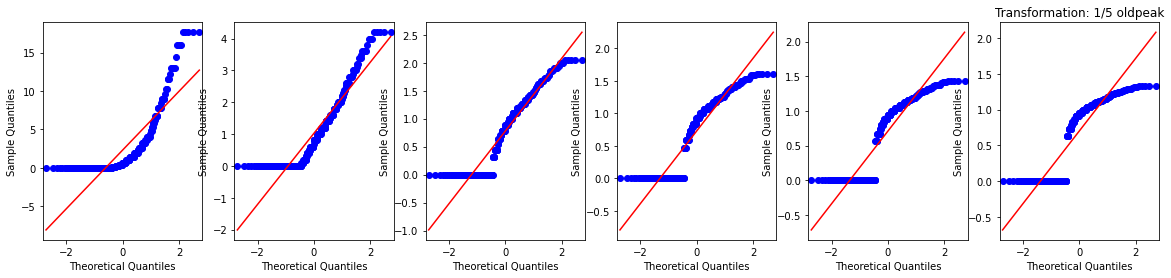

In [192]:
# Generate QQ plots to select best transformation for continuous variables

for column in df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (20,4), sharey = False)
    number = 1
    for i in [0.5, 1, 2, 3, 4, 5]:
        data = df[column]**(1/i)
        ax_val = 'ax' + str(number)
        qqplot(data, line='s', ax = eval(ax_val))
        plt.title("Transformation: 1/" + str(i) + " " + column.format(str(i)))
        number += 1

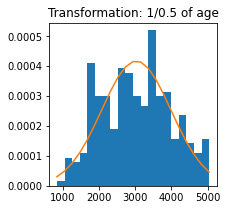

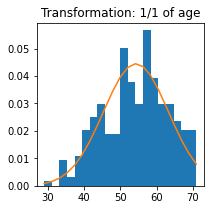

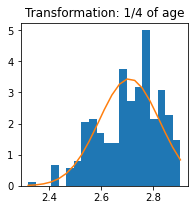

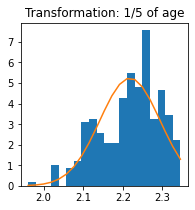

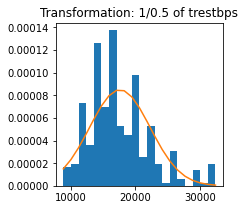

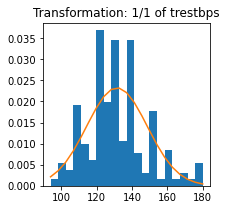

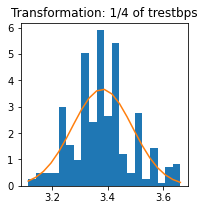

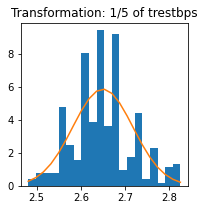

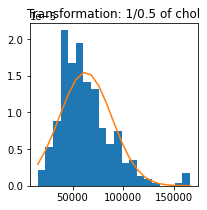

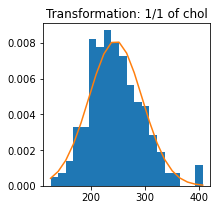

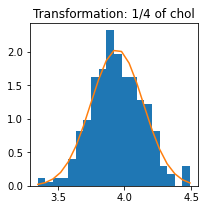

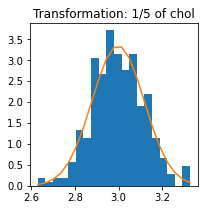

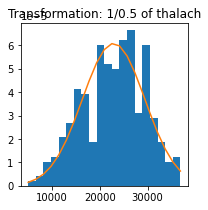

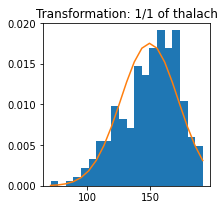

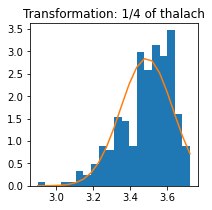

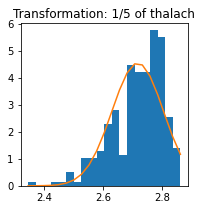

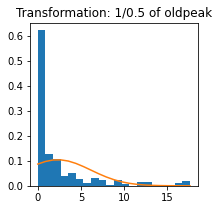

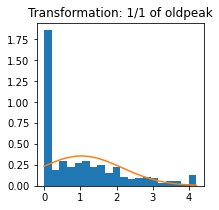

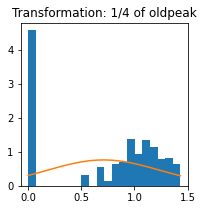

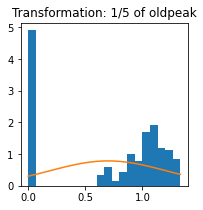

In [193]:
# Check histograms to select best transformation

for column in df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]:
    for i in [0.5, 1, 4, 5]:
        plt.figure(figsize=(3,3))
        data = df[column]**(1/i)
        n, bins, patches = plt.hist(data, 20, density=True)
        mu = np.mean(data)
        sigma = np.std(data)
        plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
        plt.title("Transformation: 1/" + str(i) + " of " + str(column))
        plt.show()

In [194]:
# Create the new transformed variable
df['age'] = df['age'].apply(lambda x: x**1/0.5)
df['trestbps'] = df['trestbps'].apply(lambda x: x**(1/5))
df['chol'] = df['chol'].apply(lambda x: x**(1/4))
df['thalach'] = df['thalach'].apply(lambda x: x**(1/0.5))
df['oldpeak'] = df['oldpeak'].apply(lambda x: x**(1/4))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,ca_binary,cp_binary
0,126.0,male,asymptomatic,2.705662,3.906960,above_120,normal,22500.0,no,1.231493,upsloping,0,above_50,0,other
1,74.0,male,no_angina,2.647212,3.976354,below_120,ST_T_abnorm,34969.0,no,1.367782,upsloping,0,above_50,0,other
2,82.0,female,atyp_angina,2.647212,3.779267,below_120,normal,29584.0,no,1.087757,downsloping,0,above_50,0,other
3,112.0,male,atyp_angina,2.605171,3.919476,below_120,ST_T_abnorm,31684.0,no,0.945742,downsloping,0,above_50,0,other
4,114.0,female,typ_angina,2.605171,4.337613,below_120,ST_T_abnorm,26569.0,yes,0.880112,downsloping,0,above_50,0,typ_angina


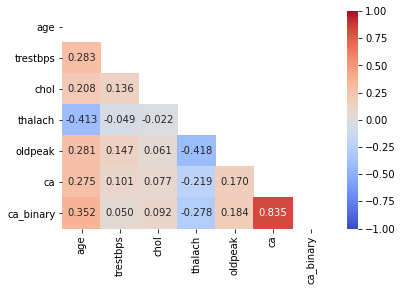

In [195]:
# Generate correlation matrix heat map
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

## Categorical variables into numeric

In [198]:
from sklearn.preprocessing import LabelEncoder

for variable in ['cp', 'target', 'cp_binary', 'sex', 'fbs','restecg', 'exang', 'slope']:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable].astype(str))
    
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,ca_binary,cp_binary
0,126.0,1,0,2.705662,3.906960,0,1,22500.0,0,1.231493,2,0,0,0,0
1,74.0,1,2,2.647212,3.976354,1,0,34969.0,0,1.367782,2,0,0,0,0
2,82.0,0,1,2.647212,3.779267,1,1,29584.0,0,1.087757,0,0,0,0,0
3,112.0,1,1,2.605171,3.919476,1,0,31684.0,0,0.945742,0,0,0,0,0
4,114.0,0,3,2.605171,4.337613,1,0,26569.0,1,0.880112,0,0,0,0,1


## Create training and test sets

In [201]:
from sklearn.model_selection import train_test_split

labels = df['target']
df = df.drop(['target'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,ca_binary,cp_binary
288,114.0,1,3,2.560227,4.278201,1,0,20449.0,1,1.316074,1,1,1,1
170,112.0,1,2,2.647212,4.000000,0,1,20164.0,1,0.880112,1,1,1,0
234,140.0,1,3,2.647212,4.236078,1,1,11881.0,0,1.244666,1,3,1,1
211,122.0,1,3,2.605171,4.015534,1,0,19600.0,1,1.377449,1,1,1,1
55,104.0,1,1,2.663305,3.765295,1,0,24964.0,0,0.945742,0,1,1,0


In [202]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Standardize variables

In [203]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [204]:
# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,ca_binary,cp_binary
288,0.260413,0.721809,0.920811,-1.371368,1.604176,0.409563,-0.994958,-0.356659,1.385408,1.155539,0.626701,0.387248,1.230402,1.123610
170,0.148454,0.721809,-0.107996,-0.059819,0.237423,-2.441626,0.962514,-0.399151,1.385408,0.309878,0.626701,0.387248,1.230402,-0.889988
234,1.715881,0.721809,0.920811,-0.059819,1.397234,0.409563,0.962514,-1.634117,-0.721809,1.017024,0.626701,2.543921,1.230402,1.123610
211,0.708249,0.721809,0.920811,-0.693707,0.313740,0.409563,-0.994958,-0.483242,1.385408,1.274592,0.626701,0.387248,1.230402,1.123610
55,-0.299382,0.721809,-1.136804,0.182841,-0.915641,0.409563,-0.994958,0.316512,-0.721809,0.437184,-0.993769,0.387248,1.230402,-0.889988


## Separate sets

In [206]:
variables = []
for column in df:
    variables.append(column)
print(variables)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'ca_binary', 'cp_binary']


In [215]:
df_original = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
df_featured = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
               'ca_binary', 'cp_binary']
df_reduced = ['cp', 'ca', 'slope', 'sex', 'oldpeak']

In [216]:
X_train_original = X_train[df_original]
X_val_original = X_val[df_original]
X_test_original = X_test[df_original]

X_train_featured = X_train[df_featured]
X_val_featured = X_val[df_featured]
X_test_featured = X_test[df_featured]

X_train_reduced = X_train[df_reduced]
X_val_reduced = X_val[df_reduced]
X_test_reduced = X_test[df_reduced]

## Build Models

Let's explore all datasets and later compare the best performing models

In [210]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [211]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Original data

In [213]:
gb = GradientBoostingClassifier()
parameters = { 'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train_original, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}

0.525 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.707 (+/-0.098) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.817 (+/-0.144) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.818 (+/-0.098) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.642 (+/-0.201) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.779 (+/-0.15) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.768 (+/-0.136) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.784 (+/-0.097) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.653 (+/-0.186) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.751 (+/-0.129) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.729 (+/-0.145) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.729 (+/-0.145) for {'learning_rate':

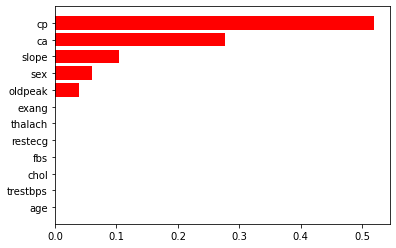

In [214]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_original.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [217]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../boosting_original_variables.pkl')

['../boosting_original_variables.pkl']

### Data with new features

In [218]:
cv.fit(X_train_featured, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})
BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}

0.525 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.707 (+/-0.098) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.817 (+/-0.144) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.818 (+/-0.098) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.642 (+/-0.201) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.785 (+/-0.162) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.79 (+/-0.157) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.79 (+/-0.122) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.658 (+/-0.189) for {'learning_rate': 0

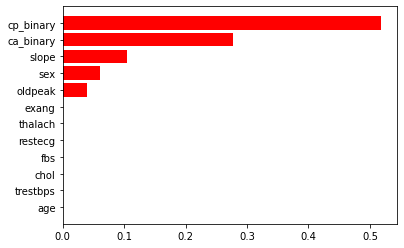

In [219]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_featured.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [220]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../boosting_featured_variables.pkl')

['../boosting_featured_variables.pkl']

### Reduced data

In [221]:
cv.fit(X_train_reduced, y_train.values.ravel())

print(cv)
print_results(cv)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})
BEST PARAMS: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}

0.525 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.707 (+/-0.098) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.812 (+/-0.114) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.812 (+/-0.083) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.68 (+/-0.21) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.795 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.768 (+/-0.099) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.768 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.697 (+/-0.188) for {'learning_rate': 0

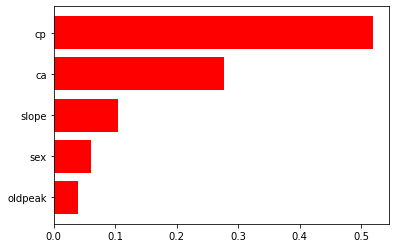

In [222]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X_train_reduced.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [223]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../boosting_reduced_variables.pkl')

['../boosting_reduced_variables.pkl']

## Compare models

In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [225]:
# Read in models
models = {}

for mdl in ['original', 'featured', 'reduced']:
    models[mdl] = joblib.load('../boosting_{}_variables.pkl'.format(mdl))

In [226]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [228]:
# Evaluate all of our models on the validation set
evaluate_model('Original Variables', models['original'], X_val_original, y_val)
evaluate_model('Cleaned Variables', models['featured'], X_val_featured, y_val)
evaluate_model('Reduced Variables', models['reduced'], X_val_reduced, y_val)

Original Variables -- 	Accuracy: 0.918 / Precision: 0.897 / Recall: 0.929 / Latency: 2.0ms
Cleaned Variables -- 	Accuracy: 0.918 / Precision: 0.897 / Recall: 0.929 / Latency: 2.0ms
Reduced Variables -- 	Accuracy: 0.918 / Precision: 0.897 / Recall: 0.929 / Latency: 3.0ms


In [231]:
# Evaluate our final model on the test set
evaluate_model('Reduced Variables', models['reduced'], X_test_reduced, y_test)

Reduced Variables -- 	Accuracy: 0.787 / Precision: 0.739 / Recall: 0.708 / Latency: 2.0ms


All models have similar performance; therefore, the best option is the reduced model.